In [1]:
import pandas as pd 
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline 

In [2]:
data_1=pd.read_excel("1.xlsx")
data_2=pd.read_excel("2.xlsx")

# Преобразование 1 файла

In [7]:
data_1_corr=data_1.loc[5:, [data_1.columns[0], data_1.columns[2], data_1.columns[3],data_1.columns[5],
                data_1.columns[6],data_1.columns[7],data_1.columns[23],data_1.columns[25]]]

data_1_corr=data_1_corr.rename(columns={'Unnamed: 0':"Subkonto_1", 
             'Unnamed: 2':"Subkonto_3", 
             'Unnamed: 3':"Code_1", 
             'Unnamed: 5':"Article", 
             'Unnamed: 6':"Organization_1",
             'Unnamed: 7':"Account", 
             'Unnamed: 23':"Count_1", 
             'Unnamed: 25':"Summ_1"}) 
data_1_corr

,Subkonto_1,Subkonto_3,Code_1,Article,Organization_1,Account,Count_1,Summ_1
5,Сальник 38х56х10,Склад1,ЦБ035921,19034616В,01 Филиал,10.05,1,160
6,Уплотнение корпуса термостатов ДВС,Склад2,ЦБ036591,51.06904-0042,01 Филиал,10.05,3,2527.42
7,Журнал выезд-заезд автом.,Склад3,ЦБ036776,ЦБ036776,03 Филиал,10.09,NaN,NaN
8,"Лампа H1 24V/70W ""Диалуч""",Склад4,ЦБ037403,24701,01 Филиал,10.05,44,2992.93
9,Фильтр топливный сепаратора PL420X Solaris Int...,Склад5,ЦБ037543,50014174,01 Филиал,10.05,11,31228
...,...,...,...,...,...,...,...,...
1285,Хомут пласт. 5х180 (100 шт),Склад1281,ЦБ169649,ЦБ169649,01 Филиал,10.05,1,111.6
1286,Насос водяной SCANIA/ГолАЗ,Склад1282,ЦБ169697,WS.020.07-002,01 Филиал,10.05,1,30471.9
1287,Актион-Пресс,Склад1283,ЦБ169865,ЦБ169865,01 Филиал,002,1,NaN
1288,Система Гла,Склад1284,ЦБ169866,ЦБ169866,01 Филиал,002,1,NaN


# Преобразование 2 файла

In [8]:
data_2_corr=data_2.loc[9:1315, [data_2.columns[4], data_2.columns[0], data_2.columns[9],data_2.columns[26],
                data_2.columns[27],data_2.columns[29]]]

data_2_corr=data_2_corr.rename(columns={'Unnamed: 4':"Organization_2", 
             'Unnamed: 0':"Nomenclature", 
             'Unnamed: 9':"Code_2", 
             'Unnamed: 26':"Count_2", 
             'Unnamed: 27':"Summ_2",
             'Unnamed: 29':"Summ_NDS"})
data_2_corr

,Organization_2,Nomenclature,Code_2,Count_2,Summ_2,Summ_NDS
9,05 Филиал,000.350.15.13 втулка р/ш 0-345 рем.,ЦБ133606,10,9882.5,NaN
10,01 Филиал,4324100022 Ремкомплект осушителя воздуха,ЦБ133634,10,9156.8,NaN
11,01 Филиал,55554-8D000 Сайлентблок р/ш заднего моста (3),ЦБ133656,20,22184,NaN
12,01 Филиал,897.181.531.4 Диафрагма 4-х конт.защитн.клап.,ЦБ133680,190,19617.5,NaN
13,01 Филиал,MOBIL 75*90 SHC,ЦБ109045,2,1477.4,NaN
...,...,...,...,...,...,...
1311,01 Филиал,Эмаль ПФ-115 белая,ЦБ152712,60,7920,1208.14
1312,01 Филиал,Эмаль ПФ-115 желтая,ЦБ152713,60,7560,1153.22
1313,01 Филиал,Эмаль ПФ-115 синяя,ЦБ108315,57,6840,1043.39
1314,01 Филиал,Эмаль ПФ-115 черная,ЦБ109032,27,2835,432.46


# Создаем общую таблицу

In [9]:
df = pd.DataFrame()
data_1_corr['Code_1']
data_2_corr['Code_2']
df['Code']= list(data_1_corr['Code_1']) + list(data_2_corr['Code_2'])
df=df.drop_duplicates ()
df

,Code
0,ЦБ035921
1,ЦБ036591
2,ЦБ036776
3,ЦБ037403
4,ЦБ037543
...,...
2347,ЦБ039843
2382,ЦБ166501
2383,ЦБ039784
2385,ЦБ039580


In [10]:
data_1_s_c=data_1_corr.groupby(["Code_1","Organization_1","Subkonto_1"],as_index=False). \
aggregate({"Summ_1":"sum","Count_1":"sum"}) 
data_2_s_c=data_2_corr.groupby(["Code_2","Organization_2","Nomenclature"],as_index=False). \
aggregate({"Summ_2":"sum","Count_2":"sum","Summ_NDS":"sum"})

In [11]:
df=df.merge(data_1_s_c, how = 'left', left_on='Code', right_on='Code_1')
df=df.merge(data_2_s_c, how = 'left', left_on='Code', right_on='Code_2')
df

,Code,Code_1,Organization_1,Subkonto_1,Summ_1,Count_1,Code_2,Organization_2,Nomenclature,Summ_2,Count_2,Summ_NDS
0,ЦБ035921,ЦБ035921,01 Филиал,Сальник 38х56х10,160.00,1.0,ЦБ035921,01 Филиал,Сальник 38х56х10,160.00,1.0,0.00
1,ЦБ036591,ЦБ036591,01 Филиал,Уплотнение корпуса термостатов ДВС,2527.42,3.0,ЦБ036591,01 Филиал,Уплотнение корпуса термостатов ДВС,2982.36,3.0,454.94
2,ЦБ036776,ЦБ036776,03 Филиал,Журнал выезд-заезд автом.,0.00,0.0,ЦБ036776,01 Филиал,Журнал выезд-заезд автом.,0.00,0.0,0.00
3,ЦБ037403,ЦБ037403,01 Филиал,"Лампа H1 24V/70W ""Диалуч""",2992.93,44.0,ЦБ037403,01 Филиал,"Лампа H1 24V/70W ""Диалуч""",5304.00,65.0,597.47
4,ЦБ037543,ЦБ037543,01 Филиал,Фильтр топливный сепаратора PL420X Solaris Int...,31228.02,11.0,ЦБ037543,01 Филиал,Фильтр топливный сепаратора PL420X Solaris Int...,31540.82,11.0,312.80
...,...,...,...,...,...,...,...,...,...,...,...,...
1172,ЦБ039843,NaN,NaN,NaN,NaN,NaN,ЦБ039843,01 Филиал,Указатель поворота ГолАЗ/ЛиАЗ задний,1512.24,3.0,0.00
1173,ЦБ166501,NaN,NaN,NaN,NaN,NaN,ЦБ166501,01 Филиал,Фильтр масляный OM 904 LA /815 Atego/МАЗ/ MAHL...,808.02,1.0,0.00
1174,ЦБ039784,NaN,NaN,NaN,NaN,NaN,ЦБ039784,01 Филиал,Фильтр масляный SCANIA/ГолАЗ заднего моста,2903.97,1.0,0.00
1175,ЦБ039580,NaN,NaN,NaN,NaN,NaN,ЦБ039580,01 Филиал,Фильтр масляный гидропривода вентилятора SCANI...,5537.84,2.0,0.00


In [12]:
def alert(row):
    if row['Code_1']==row['Code_2'] and row['Organization_1']==row['Organization_2']:
        return 'Ok'
    elif row['Code_1']==row['Code_2'] and row['Organization_1']!=row['Organization_2']:
        return 'Organization_mismatch'
    elif row['Code_1']!=row['Code']:
        return '1_no_2'
    else:
        return '2_no_1'
    
df['Coments'] = df.apply(alert, axis=1)
df['Count_difference']=df["Count_1"] - df["Count_2"]
df['Summ_difference']=df["Summ_1"] - df["Summ_2"]

df = df[['Subkonto_1', 'Code_1','Organization_1', 'Count_1','Summ_1',
       'Organization_2', 'Nomenclature','Code_2', 'Count_2','Summ_2',
        'Summ_NDS','Count_difference','Summ_difference','Coments','Code']]

In [13]:
df

,Subkonto_1,Code_1,Organization_1,Count_1,Summ_1,Organization_2,Nomenclature,Code_2,Count_2,Summ_2,Summ_NDS,Count_difference,Summ_difference,Coments,Code
0,Сальник 38х56х10,ЦБ035921,01 Филиал,1.0,160.00,01 Филиал,Сальник 38х56х10,ЦБ035921,1.0,160.00,0.00,0.0,0.00,Ok,ЦБ035921
1,Уплотнение корпуса термостатов ДВС,ЦБ036591,01 Филиал,3.0,2527.42,01 Филиал,Уплотнение корпуса термостатов ДВС,ЦБ036591,3.0,2982.36,454.94,0.0,-454.94,Ok,ЦБ036591
2,Журнал выезд-заезд автом.,ЦБ036776,03 Филиал,0.0,0.00,01 Филиал,Журнал выезд-заезд автом.,ЦБ036776,0.0,0.00,0.00,0.0,0.00,Organization_mismatch,ЦБ036776
3,"Лампа H1 24V/70W ""Диалуч""",ЦБ037403,01 Филиал,44.0,2992.93,01 Филиал,"Лампа H1 24V/70W ""Диалуч""",ЦБ037403,65.0,5304.00,597.47,-21.0,-2311.07,Ok,ЦБ037403
4,Фильтр топливный сепаратора PL420X Solaris Int...,ЦБ037543,01 Филиал,11.0,31228.02,01 Филиал,Фильтр топливный сепаратора PL420X Solaris Int...,ЦБ037543,11.0,31540.82,312.80,0.0,-312.80,Ok,ЦБ037543
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1172,NaN,NaN,NaN,NaN,NaN,01 Филиал,Указатель поворота ГолАЗ/ЛиАЗ задний,ЦБ039843,3.0,1512.24,0.00,NaN,NaN,1_no_2,ЦБ039843
1173,NaN,NaN,NaN,NaN,NaN,01 Филиал,Фильтр масляный OM 904 LA /815 Atego/МАЗ/ MAHL...,ЦБ166501,1.0,808.02,0.00,NaN,NaN,1_no_2,ЦБ166501
1174,NaN,NaN,NaN,NaN,NaN,01 Филиал,Фильтр масляный SCANIA/ГолАЗ заднего моста,ЦБ039784,1.0,2903.97,0.00,NaN,NaN,1_no_2,ЦБ039784
1175,NaN,NaN,NaN,NaN,NaN,01 Филиал,Фильтр масляный гидропривода вентилятора SCANI...,ЦБ039580,2.0,5537.84,0.00,NaN,NaN,1_no_2,ЦБ039580


In [10]:
df.to_excel('table_join.xlsx')

In [14]:
df_table=df[['Code_2', 'Count_2','Summ_2','Count_difference','Coments','Code']]
df_table=df_table.groupby(["Coments"],as_index=False). \
aggregate({"Code":"count","Summ_2":"sum","Count_2":"sum"}). \
rename(columns={"Code":"count"}) . \
sort_values("count",ascending=False)
df_table['sum/count']=df_table['Summ_2']/df_table['Count_2']
df_table=df_table[['Coments','count','sum/count']]
df_table

,Coments,count,sum/count
2,Ok,1110,47.880947
1,2_no_1,36,NaN
0,1_no_2,28,118.962769
3,Organization_mismatch,3,630.628718


([<matplotlib.patches.Wedge at 0x26a47c56d00>,
 [Text(-1.0824570895016885, 0.19566974571336732, 'Ok'),
  Text(1.0625816758907214, -0.28446472902851405, '2_no_1'),
  Text(1.0954734184186832, -0.09968946553214471, '1_no_2'),
  Text(1.099964733499612, -0.008808238026286856, 'Organization_mismatch')])

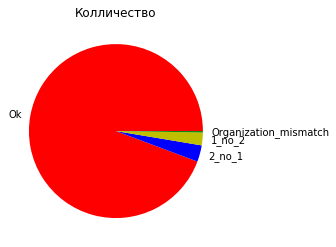

In [15]:
values=df_table['count']
name=df_table['Coments']
colors=["r","b","y","g"]
plt.title("Колличество")
explode=[0,0,0,0]
plt.pie(values,colors=colors,labels=name,explode=explode)

In [16]:
print(f"Общий итог\nКоличество={df_table['count'].sum()}\nСумма делить на количество={round(df['Summ_2'].sum()/df['Count_2'].sum(),2)}")

Общий итог
Количество=1177
Сумма делить на количество=50.11
